In [1]:
import cv2
import dlib
import skimage.draw
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def face_extraction(image):
    
    # reading the image
    img = cv2.imread(image)
    
    
    # detecting the face present in the image
    face_detector = dlib.get_frontal_face_detector()

    # Convert image into original color format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = face_detector(img, 1)

    for face in faces:
        x = face.left()
        y = face.top()
        w = face.right() - x
        h = face.bottom() - y

        # draw box over face
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 25)

    # predicting the 81 landmark on the face
    predictor = dlib.shape_predictor('shape_predictor_81_face_landmarks.dat')

    # loading the image using dlib library
    img1 = dlib.load_rgb_image(image)
    
    # detection of face
    rectangle = face_detector(img1)[0]

    # prediction of shape of face (81 landmarks on the face)
    shape = predictor(img1, rectangle)

    # convert above landmarks in the numpy array of list
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])

    # vertices of outlook of face
    outline_indices = ConvexHull(landmarks).vertices

    # drawing a polygon on the landmarks using scikit-image library
    Y, X = skimage.draw.polygon(landmarks[outline_indices, 1], landmarks[outline_indices, 0])

    # creating a blank image
    cropped_img = np.zeros(img1.shape, dtype=np.uint8)

    # using the above polygon to get a face and pasting in on balnk image
    cropped_img[Y, X] = img1[Y, X]
    #cropped_img = cv2.resize(cropped_img,(200,300))



    return img1, img, cropped_img


(-0.5, 1825.5, 2739.5, -0.5)

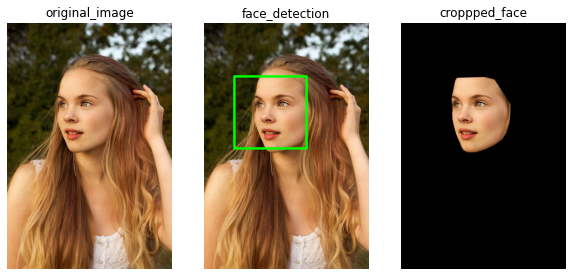

In [3]:
fig = plt.figure(figsize=(10, 7))
image_path  = 'Vision2/100' + str(3) + '.jpg'
img1, img, cropped_img = face_extraction(image_path)


fig.add_subplot(1, 3, 1)
plt.imshow(img1)
plt.title("original_image")
plt.axis("off")

fig.add_subplot(1, 3, 2)
plt.imshow(img)
plt.title("face_detection")
plt.axis("off")

fig.add_subplot(1, 3, 3)
plt.imshow(cropped_img)
plt.title("croppped_face")
plt.axis("off")

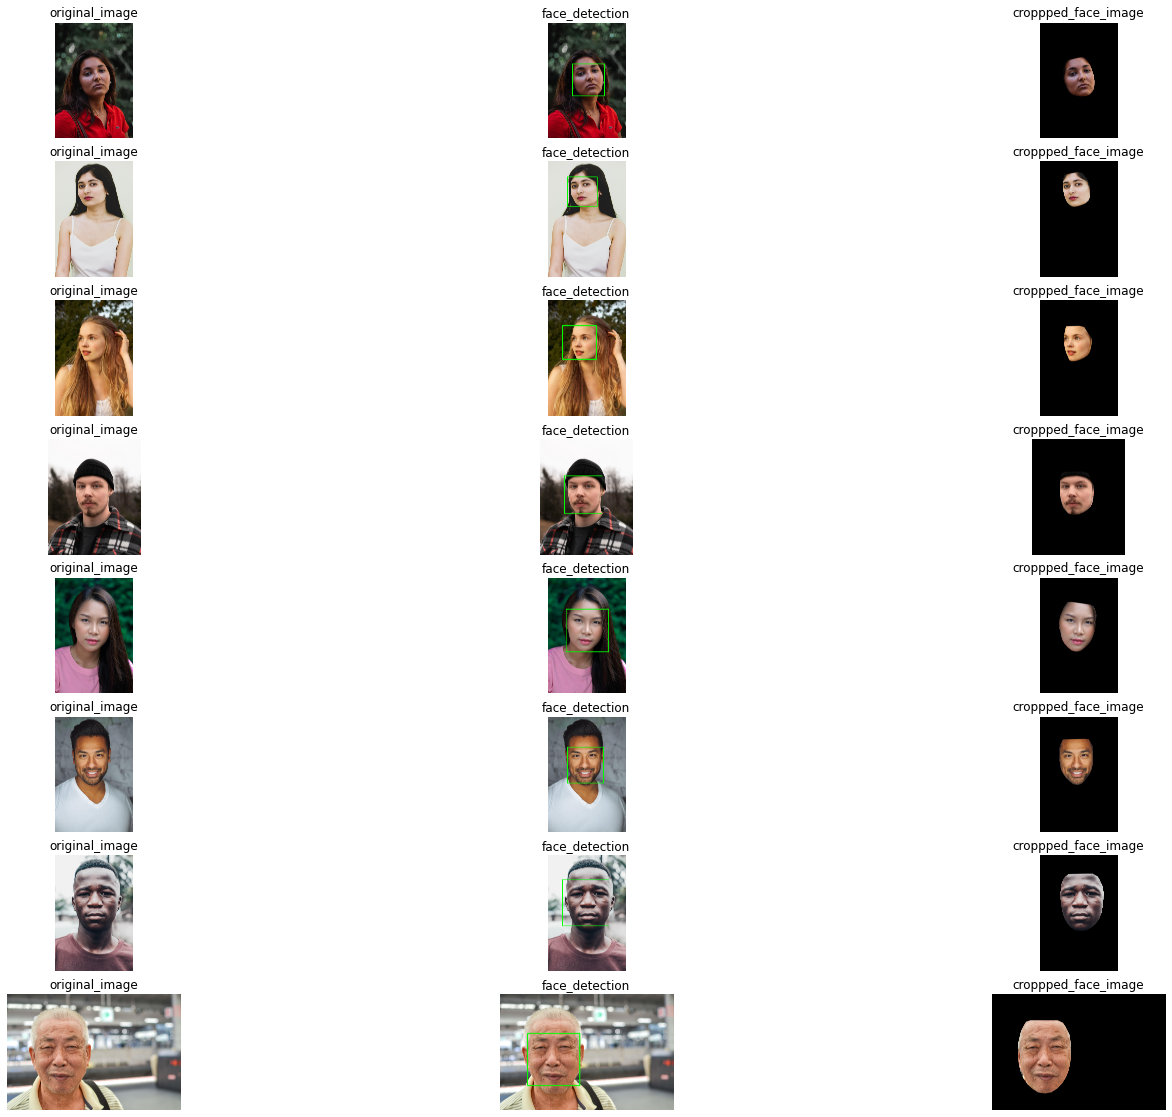

In [4]:
fig = plt.figure(figsize=(25, 20))
for i in range(8):
    image_path  = 'Vision2/100' + str(i+1) + '.jpg'
    img1, img, cropped_img = face_extraction(image_path)

    fig.add_subplot(8, 3, 1 + (3*i))
    plt.imshow(img1)
    plt.title("original_image")
    plt.axis("off")

    fig.add_subplot(8, 3, 2 + (3*i))
    plt.imshow(img)
    plt.title("face_detection")
    plt.axis("off")

    fig.add_subplot(8, 3, 3 + (3*i))
    plt.imshow(cropped_img)
    plt.title("croppped_face_image")
    plt.axis("off")


    